# MOVIE GENRE CLASSIFICATION 

## 1) Importing libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

## 2) Loading datasets

In [25]:
train_data=pd.read_csv("train_data.txt",sep=':::',header=None,names=['ID','TITLE','GENRE','DESCRIPTION'])
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [26]:
test_data= pd.read_csv("test_data.txt",sep=':::',header=None,names=['ID','TITLE','DESCRIPTION'])
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [27]:
test_data_solution=pd.read_csv("test_data_solution.txt",sep=':::',header=None,names=['ID','TITLE','GENRE','DESCRIPTION'])
test_data_solution.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [28]:
train_data['GENRE'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [29]:
train_data['GENRE'].value_counts()

 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: GENRE, dtype: int64

## 3) EDA & Visualization for train_data

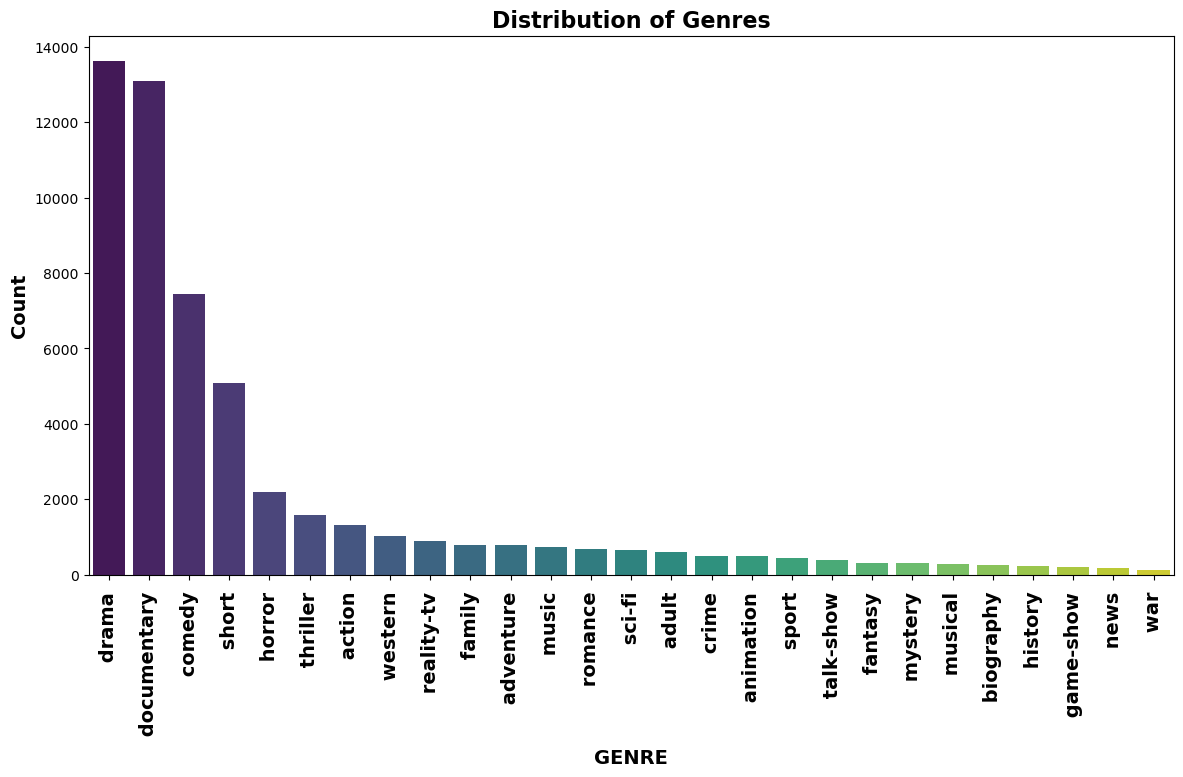

In [30]:
plt.figure(figsize=(14, 7))
counts = train_data['GENRE'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('GENRE', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

## 4) Model building

In [31]:
X_train = train_data['DESCRIPTION']
y_train = train_data['GENRE']

### Text Vectorization Using TF-IDF

In [32]:
vectorizer = TfidfVectorizer(stop_words='english')

In [33]:
X_train_tfidf = vectorizer.fit_transform(X_train)

### LogisticRegression classifier

In [44]:
lgc = LogisticRegression()

In [45]:
lgc.fit(X_train_tfidf, y_train)

LogisticRegression()

## 5) predicting Genre of test data

In [36]:
X_test_tfidf = vectorizer.transform(test_data['DESCRIPTION'])
y_test=test_data_solution["GENRE"]

In [37]:
y_predict=lgc.predict(X_test_tfidf)
y_predict

array([' drama ', ' drama ', ' documentary ', ..., ' drama ', ' drama ',
       ' documentary '], dtype=object)

In [38]:
lgc_accuracy=accuracy_score(y_predict,y_test)
print('accuracy by using logistic regression classifier is : ',lgc_accuracy)

accuracy by using logistic regression classifier is :  0.59119926199262


In [39]:
 print(confusion_matrix(lgc_y_predict,y_test))

[[  368     5    34    26     0    46    29     6    43     3    12     2
      2    15     0     1     2     0    10     1    28    16    12     0
     38    12     8]
 [    2   135    42     0     0     9     0    15     8     0     0     1
      1     2     2     0     0     0     0     3     3     3     0     2
      3     1     0]
 [    5    17   120     6     0     0     1     3     3     3     5     1
      0     3     0     0     0     0     0     0     3     0     1     0
      0     2     1]
 [    0     0     2    14     0     1     0     0     0     2     4     0
      0     0     0     0     0     0     0     0     0     1     0     0
      0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0]
 [  123   191   108   130    11  4467    68   253  1092   183    34    30
      3   140    53    80    29    20   183   129    46   447    23    60
    145

In [40]:
print(classification_report(lgc_y_predict,y_test))

               precision    recall  f1-score   support

      action        0.28      0.51      0.36       719
       adult        0.23      0.58      0.33       232
   adventure        0.15      0.69      0.25       174
   animation        0.03      0.58      0.05        24
   biography        0.00      0.00      0.00         0
      comedy        0.60      0.55      0.58      8091
       crime        0.03      0.37      0.05        35
 documentary        0.87      0.67      0.75     17033
       drama        0.79      0.54      0.64     19824
      family        0.09      0.49      0.15       140
     fantasy        0.01      0.80      0.02         5
   game-show        0.54      0.84      0.66       124
     history        0.00      0.00      0.00         0
      horror        0.58      0.66      0.62      1951
       music        0.44      0.66      0.52       483
     musical        0.01      1.00      0.01         2
     mystery        0.00      1.00      0.01         1
        n